# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
pd.set_option('display.max_columns', None)
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,0,0,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",España,Madrid,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,0,0,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [12]:
precio_max = ds['price'].max()
direccion_precio_max = ds.loc[ds['price'].idxmax(), 'address']
print(f'La casa con dirección en Calle {direccion_precio_max}, es la más cara y su precio es de {precio} euros.')

La casa con dirección en Calle El Escorial, es la más cara y su precio es de 8500000 euros.


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [13]:
ds = ds[ds['price'] > 0]
precio_min = ds['price'].min()
direccion_precio_min = ds.loc[ds['price'].idxmin(), 'address']
print(f'La casa con dirección en Calle {direccion_precio_min}, es la más barata y su precio es de {precio_min} euros.')

La casa con dirección en Calle Berlin, Coslada, es la más barata y su precio es de 600 euros.


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [15]:
superficie_max = ds['surface'].max()
direccion_superficie_max = ds.loc[ds['surface'].idxmax(), 'address']
print(f'La casa más grande está ubicada en {direccion_superficie_max}, y su superficie es de {superficie_max} metros')

superficie_min = ds['surface'].min()
direccion_superficie_min = ds.loc[ds['surface'].idxmin(), 'address']
print(f'La casa más pequeña está ubicada en {direccion_superficie_min}, y su superficie es de {superficie_min} metros')

La casa más grande está ubicada en Sevilla la Nueva, y su superficie es de 249000.0 metros
La casa más pequeña está ubicada en Calle Amparo,  Madrid Capital, y su superficie es de 15.0 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [22]:
contador_poblaciones = ds['level5'].value_counts()
poblaciones_repetidas = contador_poblaciones[contador_poblaciones >= 1].index
print(f'Las poblaciones del data set son:')
print(*poblaciones_repetidas, sep=', ')

Las poblaciones del data set son:
 Madrid Capital, Alcalá de Henares, Las Rozas de Madrid, Móstoles, Getafe, San Sebastián de los Reyes, Boadilla del Monte, Parla, Valdemoro, Alcobendas, Torrejón de Ardoz, Pozuelo de Alarcón, Fuenlabrada, Collado Villalba, Arganda del Rey, Leganés, Alcorcón, Coslada, Villaviciosa de Odón, Pinto, Majadahonda, Aranjuez, Arroyomolinos (Madrid), Rivas-vaciamadrid, Torrelodones, Navalcarnero, Ciempozuelos, El Escorial, Galapagar, Velilla de San Antonio, Moralzarzal, San Lorenzo de El Escorial, Villanueva de la Cañada, Villanueva del Pardillo, San Martín de la Vega, Colmenar Viejo, El Álamo, Villalbilla, Miraflores de la Sierra, Humanes de Madrid, Alpedrete, Valdemorillo, Mejorada del Campo, Torrejón de la Calzada, Paracuellos de Jarama, Guadarrama, San Fernando de Henares, Meco, Camarma de Esteruelas, Tres Cantos, Algete, San Martín de Valdeiglesias, Robledo de Chavela, El Molar (Madrid), Manzanares El Real, Loeches, Brunete, Villa del Prado, Torres de la A

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [51]:
valores_nas = ds.isna()
print(valores_nas)

# Print(ds.isna().any())  Utilizaia esto para mostrar solo una serie con los boleanos por columna.

       Unnamed: 0  id_realEstates  isNew  realEstate_name  phone_realEstate  \
0           False           False  False            False             False   
1           False           False  False            False             False   
2           False           False  False            False             False   
3           False           False  False            False             False   
4           False           False  False            False             False   
...           ...             ...    ...              ...               ...   
15330       False           False  False            False             False   
15331       False           False  False            False             False   
15332       False           False  False            False             False   
15333       False           False  False            False             False   
15334       False           False  False            False             False   

       url_inmueble  rooms  bathrooms  surface  pri

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [36]:
print(f'Medidas con valores NAs modificados y cambiados por valores 0: {ds.fillna(0).shape}')
print(f'Medidas con valores NAs eliminados por metodo dropna: {ds.dropna().shape}')
print(f'Medidas originales del data set: {ds.shape}')
print(f'''Al aparecer valores NAs en todas las filas del dataset se me ocurre cambiarlos por valores 0 para poder seguir
trabajando con el y no eliminar todas las filas del mismo.''')

Medidas con valores NAs modificados y cambiados por valores 0: (15275, 37)
Medidas con valores NAs eliminados por metodo dropna: (0, 37)
Medidas originales del data set: (15275, 37)
Al aparecer valores NAs en todas las filas del dataset se me ocurre cambiarlos por valores 0 para poder seguir
trabajando con el y no eliminar todas las filas del mismo.


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [37]:
indice_arroyo = ds[ds['level5'] == 'Arroyomolinos (Madrid)'].index
media_precios_arroyo = round(ds.loc[indice_arroyo, "price"].mean(), 2)
print(f'La media de precios en la población de Aroyomolinos es de {media_precios_arroyo} euros.')

La media de precios en la población de Aroyomolinos es de 298905.18 euros.


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


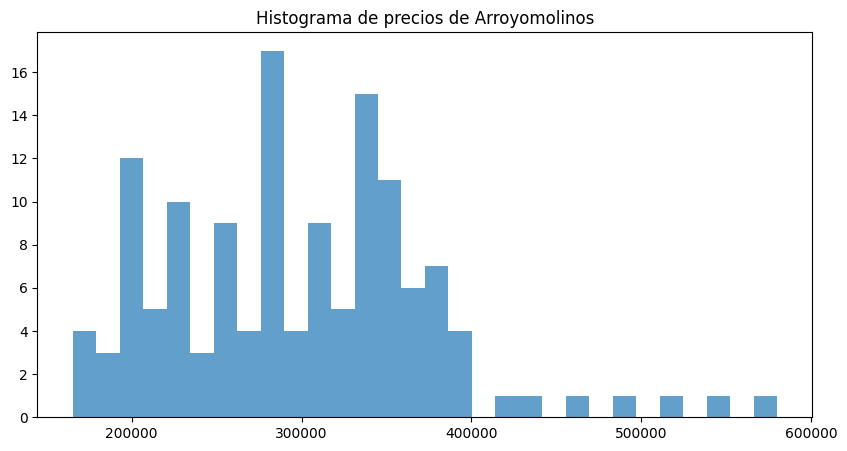

In [44]:
indice_arroyo = ds[ds['level5'] == 'Arroyomolinos (Madrid)'].index
precios_arroyo = ds.loc[indice_arroyo, "price"]
precios_arroyo = precios_arroyo[precios_arroyo > 0].dropna()

plt.figure(figsize = (10, 5))
plt.hist(precios_arroyo, bins = 30, alpha = 0.7)
plt.title("Histograma de precios de Arroyomolinos")
plt.show()

En el siguiente histograma, posdemos obserbar como los precios de la localidad de Arroyomolinos (Madrid), oxilan mayoritariamente entre los 150.000 euros y los 450.000 euros aproximadamente, y minoritariamente, crecen en algunos casos hasta alcanzar cifras que se aproximan hasta los 600.000 eruos.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [67]:
indice_valde = ds[ds['level5'] == 'Valdemorillo'].index
precios_promedio_valde = ds.loc[indice_valde, "price"].mean()

indice_gala = ds[ds['level5'] == 'Galapagar'].index
precios_promedio_gala = ds.loc[indice_gala, "price"].mean()

print(f'Precio promedio Valdemorillo: {precios_promedio_valde :.2f} euros.')
print(f'Precio promedio Galapagar: {precios_promedio_gala :.2f} euros.')
print(f'''Como podemos observar los precios promedios de las localidades de Valdemorillo y Galapagar no son identicos, pero se acercan mucho, 
siendo una diferencia pequeña, de aproximadamente 3800 euros, lo que las separa.''')

Precio promedio Valdemorillo: 363860.29 euros.
Precio promedio Galapagar: 360063.20 euros.
Como podemos observar los precios promedios de las localidades de Valdemorillo y Galapagar no son identicos, pero se acercan mucho, 
siendo una diferencia pequeña, de aproximadamente 3800 euros, lo que las separa.


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [68]:
ds['pps'] = ds['price'] / ds['surface']

indice_valde = ds[ds['level5'] == 'Valdemorillo'].index
precios_promedio_pps_valde = ds.loc[indice_valde, "pps"].mean()

indice_gala = ds[ds['level5'] == 'Galapagar'].index
precios_promedio_pps_gala = ds.loc[indice_gala, "pps"].mean()

print(f'Precio promedio por metro cuadrado Valdemorillo: {precios_promedio_pps_valde :.2f} euros.')
print(f'Precio promedio por metro cuadrado Galapagar: {precios_promedio_pps_gala :.2f} euros.')

print(f'''Como podemos observar, al igual que sucede con los precios promediode ambas localidades,  los precios promedios por metro 
cuadrado de las localidades de Valdemorillo y Galapagar no son identicos, pero se acercan mucho, siendo una diferencia de aproximadamente 
300 euros, lo que las separa.''')

Precio promedio por metro cuadrado Valdemorillo: 1317.95 euros.
Precio promedio por metro cuadrado Galapagar: 1606.32 euros.
Como podemos observar, al igual que sucede con los precios promediode ambas localidades,  los precios promedios por metro 
cuadrado de las localidades de Valdemorillo y Galapagar no son identicos, pero se acercan mucho, siendo una diferencia de aproximadamente 
300 euros, lo que las separa.


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

In [ ]:
# TODO: Código

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [ ]:
# TODO

#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [ ]:
# TODO

#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [ ]:
# TODO

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

In [ ]:
# TODO: Code

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [ ]:
# TODO

#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [ ]:
# TODO

#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

In [ ]:
# TODO

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [ ]:
# TODO

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

In [ ]:
# TODO

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [ ]:
from ipyleaflet import Map, basemaps

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

In [ ]:
## Aquí: traza la coordenadas de los estados

## PON TU CÓDIGO AQUÍ:
